In [2]:
from fastai.vision.all import *
import os

In [3]:
# Define the path to the dataset
train_dir = Path(r"C:\Users\jahid\Desktop\ML_Lab_2\train")

In [4]:
# Define a function to label the data based on filenames
def label_func(filename):
    return 'cat' if 'cat' in filename.name else 'dog'

In [5]:
# Create a DataBlock
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Define image and category blocks
    get_items=get_image_files,          # Get all image files in the directory
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Split into train/validation sets
    get_y=label_func,                   # Function to get labels
    item_tfms=Resize(150),              # Resize all images to 150x150
    batch_tfms=aug_transforms(size=150) # Add data augmentation
)

In [6]:
# Load the dataset
dls = data_block.dataloaders(train_dir, bs=32)  # Create dataloaders with batch size 32

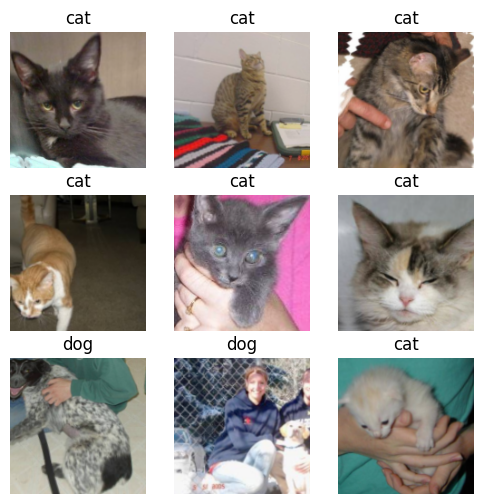

In [7]:
# Visualize a batch of data
dls.show_batch(max_n=9, figsize=(6, 6))

In [9]:
# Create a CNN learner
learn = vision_learner(dls, resnet18, metrics=accuracy)  # Use ResNet-18 as the architecture

In [10]:
# Train the model
learn.fine_tune(5)  # Fine-tune for 5 epochs

epoch,train_loss,valid_loss,accuracy,time
0,0.189133,0.101717,0.969545,12:56


epoch,train_loss,valid_loss,accuracy,time
0,0.127710,0.066962,0.977912,14:38
1,0.098006,0.063769,0.979250,15:01
2,0.061164,0.054688,0.981928,14:31
3,0.036424,0.042593,0.986613,14:33
4,0.025834,0.038168,0.988621,14:36


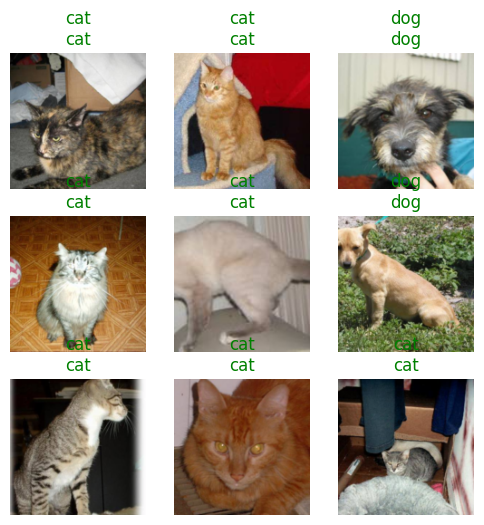

In [11]:
# Evaluate the model
learn.show_results(max_n=9, figsize=(6, 6))  # Show results on validation data

In [12]:
# Save the model
learn.export('cat_dog_classifier.pkl')

<h1>Testing the Model<h1>

In [14]:
# Load the model (example)
loaded_learn = load_learner('cat_dog_classifier.pkl')

# Predict on a single image (example)
img = PILImage.create(r"C:\Users\jahid\Desktop\ML_Lab_2\pic.png")
pred, pred_idx, probs = loaded_learn.predict(img)
print(f"Prediction: {pred}, Probability: {probs[pred_idx]:.4f}")

Prediction: dog, Probability: 0.6464


In [15]:
# Predict on a single image (example)
img2 = PILImage.create(r"C:\Users\jahid\Desktop\ML_Lab_2\pic2.png")
pred, pred_idx, probs = loaded_learn.predict(img2)
print(f"Prediction: {pred}, Probability: {probs[pred_idx]:.4f}")

Prediction: cat, Probability: 0.9999
